In [32]:
!pip install tensorboard pandas
!pip install matplotlib seaborn


/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/bin/python -m pip install --upgrade pip' command.
/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/bin/python -m pip install --upgrade pip' command.


In [33]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [34]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.5.0


In [35]:
def convert_tb_data(root_dir, sort_by=None):
    """Convert local TensorBoard data into Pandas DataFrame.
    
    Function takes the root directory path and recursively parses
    all events data.    
    If the `sort_by` value is provided then it will use that column
    to sort values; typically `wall_time` or `step`.
    
    *Note* that the whole data is converted into a DataFrame.
    Depending on the data size this might take a while. If it takes
    too long then narrow it to some sub-directories.
    
    Paramters:
        root_dir: (str) path to root dir with tensorboard data.
        sort_by: (optional str) column name to sort by.
    
    Returns:
        pandas.DataFrame with [wall_time, name, step, value] columns.
    
    """
    import os
    import pandas as pd
    from tensorflow.python.summary.summary_iterator import summary_iterator

    def convert_tfevent(filepath):
        return pd.DataFrame([
            parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
        ])

    def parse_tfevent(tfevent):
        return dict(
            wall_time=tfevent.wall_time,
            name=tfevent.summary.value[0].tag,
            step=tfevent.step,
            value=float(tfevent.summary.value[0].simple_value),
        )
    
    columns_order = ['wall_time', 'name', 'step', 'value']
    
    out = []
    for (root, _, filenames) in os.walk(root_dir):
        for filename in filenames:
            if "events.out.tfevents" not in filename:
                continue
            file_full_path = os.path.join(root, filename)
            out.append(convert_tfevent(file_full_path))

    # Concatenate (and sort) all partial individual dataframes
    all_df = pd.concat(out)[columns_order]
    if sort_by is not None:
        all_df = all_df.sort_values(sort_by)
        
    return all_df.reset_index(drop=True)

In [37]:
dir_path = "/fsx/code/pytorch_resnet_cifar10_mirror/logs/"
exp_name = "skip-step-var-len-run-val-fix-worker-0-scale-4.0-lr-0.1-bs-64-scheduler--adascale-True-shuffle-run_max_steps-True-scale_lr_schedule-False"
df = convert_tb_data(f"{dir_path}/{exp_name}")

print(df.head())

      wall_time                       name  step     value
0  1.642635e+09                    Val/Acc     0  0.093500
1  1.642635e+09            Train/Loss_step     1  3.513372
2  1.642635e+09                       Gain     0  1.071023
3  1.642635e+09        Gain_step_scale_dep     1  1.071023
4  1.642635e+09  Train/Loss_step_scale_dep     1  3.513372


In [38]:
grouped_df = df.groupby('name')
grouped_df_lst = grouped_df["value"].apply(list)
grouped_df_lst = grouped_df_lst.reset_index()


In [39]:
grouped_df_lst

,name,value
0,Gain,"[1.0710227489471436, 1.0710227489471436, 1.071..."
1,Gain_step_scale_dep,"[1.0710227489471436, 1.0710227489471436, 1.071..."
2,Learning Rate,"[0.10000000149011612, 0.10000000149011612, 0.1..."
3,Train/Loss_epoch,"[2.2117979526519775, 1.5215983390808105, 1.352..."
4,Train/Loss_step,"[3.513371706008911, 3.2284152507781982, 3.1350..."
5,Train/Loss_step_scale_dep,"[3.513371706008911, 3.2284152507781982, 3.1350..."
6,Val/Acc,"[0.09350000321865082, 0.7281000018119812, 0.80..."


In [44]:
list(grouped_df_lst.iloc(0))[0]['value']

[1.0710227489471436,
 1.0710227489471436,
 1.0710227489471436,
 1.0710227489471436,
 1.0710227489471436,
 1.0710227489471436,
 1.2025851011276245,
 1.2025851011276245,
 1.2025851011276245,
 1.2025851011276245,
 1.2025851011276245,
 1.2420992851257324,
 1.2420992851257324,
 1.2420992851257324,
 1.2420992851257324,
 1.2420992851257324,
 1.2618390321731567,
 1.2618390321731567,
 1.2618390321731567,
 1.2618390321731567,
 1.2618390321731567,
 1.2812141180038452,
 1.2812141180038452,
 1.2812141180038452,
 1.2812141180038452,
 1.2812141180038452,
 1.288369059562683,
 1.288369059562683,
 1.288369059562683,
 1.288369059562683,
 1.288369059562683,
 1.3011764287948608,
 1.3011764287948608,
 1.3011764287948608,
 1.3011764287948608,
 1.3011764287948608,
 1.3174690008163452,
 1.3174690008163452,
 1.3174690008163452,
 1.3174690008163452,
 1.3174690008163452,
 1.322980284690857,
 1.322980284690857,
 1.322980284690857,
 1.322980284690857,
 1.322980284690857,
 1.3310356140136719,
 1.3310356140136719,
 1

In [14]:

grouped_df_lst = grouped_df_lst.set_index('name')
grouped_df_lst

,value
name,
Learning Rate,"[0.10000000149011612, 0.10000000149011612, 0.1..."
Train/Loss_epoch,"[1.6183115243911743, 1.007718801498413, 1.2538..."
Train/Loss_step,"[3.9978132247924805, 3.037717819213867, 2.3176..."
Val/Acc,"[0.09350000321865082, 0.7922000288963318, 0.09..."


0.9139999747276306

In [ ]:
def extract_val_acc(df):
    grouped_df = df.groupby('name')
    grouped_df_lst = grouped_df["value"].apply(list)
    grouped_df_lst = grouped_df_lst.reset_index()
    grouped_df_lst = grouped_df_lst.set_index('name')
    return list(grouped_df_lst.loc['Val/Acc']['value'])[-1]


In [24]:
exp_name1= 'worker-0-scale-'
exp_name2 = '.0-lr-0.1-bs-64-scheduler--adascale-True-shuffle-run_max_steps-True'
scales= [2,4,8]
val_acc = []
dir_path =  "/fsx/code/pytorch_resnet_cifar10_mirror/logs/"
for scale in scales:
    path = dir_path + exp_name1+ str(scale) +exp_name2
    print(path)
    df = convert_tb_data(path)

    

/fsx/code/pytorch_resnet_cifar10_mirror/logs/worker-0-scale-2.0-lr-0.1-bs-64-scheduler--adascale-True-shuffle-run_max_steps-True


ValueError: No objects to concatenate

In [25]:
# worker-0-scale-2.0-lr-0.1-bs-32-scheduler--adascale-True-shuffle-run_max_steps-True
a= [0.8989, 0.8866, 0.8696]

# Run for max steps with LR schedule scaling
b= [0.9026, 0.8963, 0.8793]

scale = [2, 4, 8]



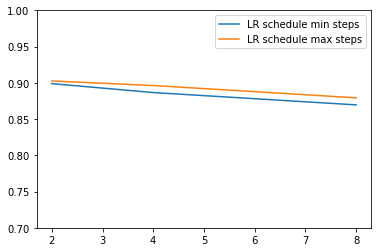

In [31]:
plt.plot( scale,  a, label="LR schedule min steps")
plt.plot( scale,  b, label="LR schedule max steps")
plt.ylim([0.7, 1])
plt.legend()
plt.show()